# NAME- HARSHADA DANDGE

PROJECT-INTERMEDIATE LEVEL TASK 2- PREDICTION USING DECISION TREE ALGORITHM

LGM(VIP)DATASCIENCE INTERN JAN-2022


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
Iris_data = pd.read_csv('Iris.csv')

In [15]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
Iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [17]:
Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
Iris_data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

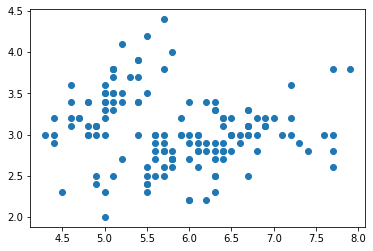

In [19]:
plt.scatter(Iris_data['SepalLengthCm'],Iris_data['SepalWidthCm'])
plt.show()

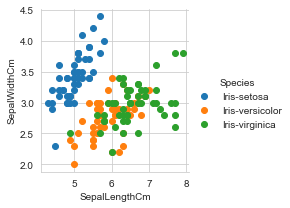

In [20]:
sns.set_style('whitegrid')
sns.FacetGrid(Iris_data,hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

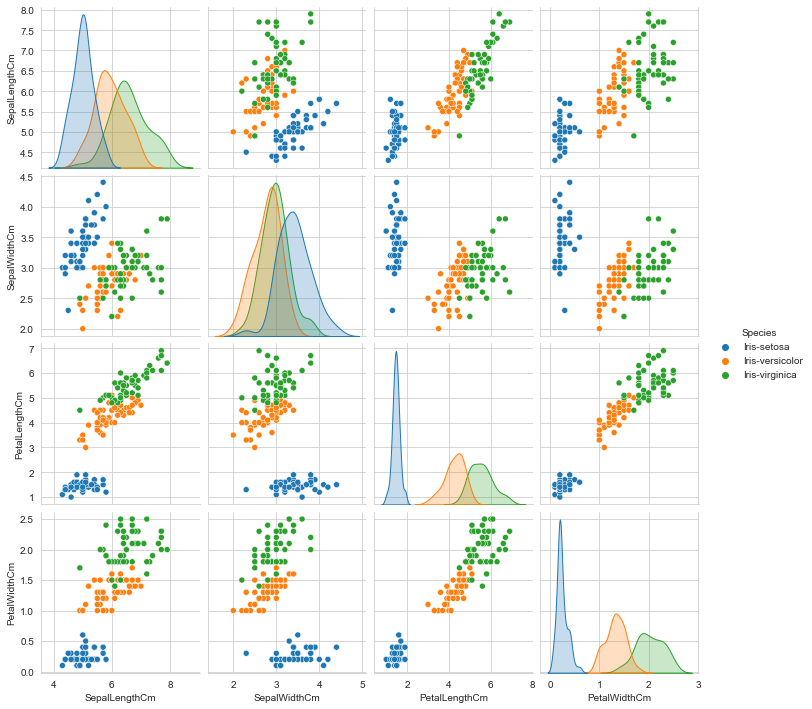

In [21]:
sns.pairplot(Iris_data.drop(['Id'],axis=1), hue='Species')
plt.show()

In [22]:
Iris_data['Sepal_diff'] = Iris_data['SepalLengthCm']-Iris_data['SepalWidthCm']
Iris_data['petal_diff'] = Iris_data['PetalLengthCm']-Iris_data['PetalWidthCm']


In [23]:
Iris_data['Sepal_petal_len_diff'] = Iris_data['SepalLengthCm']-Iris_data['PetalLengthCm']
Iris_data['Sepal_petal_width_diff'] = Iris_data['SepalWidthCm']-Iris_data['PetalWidthCm']
Iris_data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4
...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1


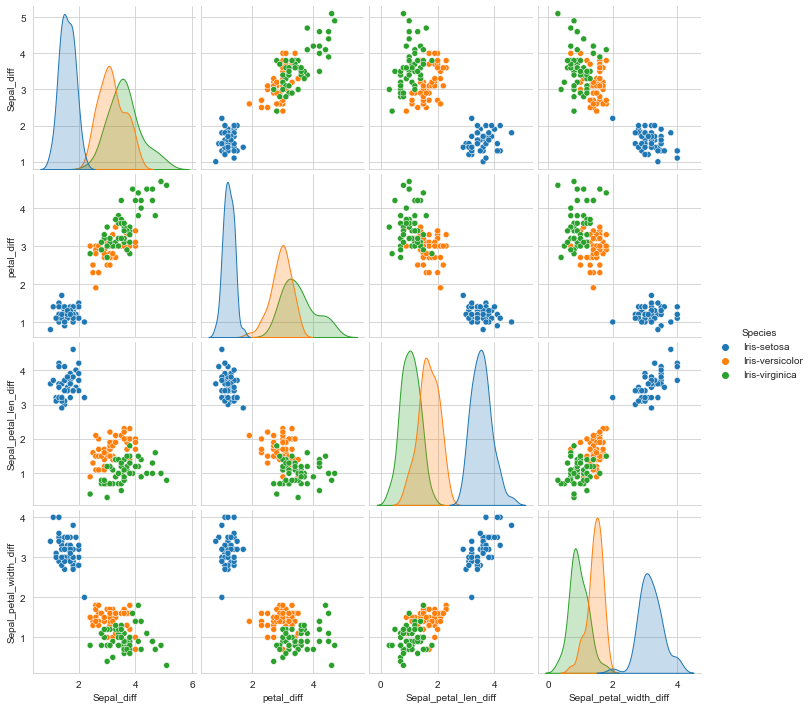

In [24]:
sns.pairplot(Iris_data[['Species','Sepal_diff','petal_diff','Sepal_petal_len_diff', \
                        'Sepal_petal_width_diff']], hue='Species')
plt.show()

In [25]:
Iris_data.drop(['Id'],axis=1,inplace=True)

[Text(0.5, 0.9166666666666666, 'X[1] <= 2.0\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[2] <= 1.45\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[3] <= 1.25\ngini = 0.266\nsamples = 38\nvalue = [0, 6, 32]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[2] <= 1.35\ngini = 0.069\nsamples = 28\nvalue = [0, 1, 27]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 25]'),
 Text(0.23076923076923078, 0.25, 'X[0] <= 3.7\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[0] <= 3.1\ngini = 0.5\nsamples = 10\nvalue = [0, 5, 5]'),
 Text(0.38461538461538464, 

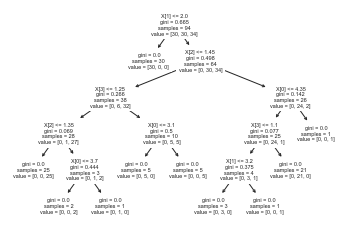

In [26]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

X = Iris_data[['Sepal_diff','petal_diff','Sepal_petal_len_diff','Sepal_petal_width_diff']]
Y = Iris_data['Species']
               
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30, random_state=42)

Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)

Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)

tree.plot_tree(Iris_clf)

In [29]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)


In [30]:
clf.fit(Xtrain, Ytrain)

DecisionTreeClassifier(max_depth=2, random_state=0)

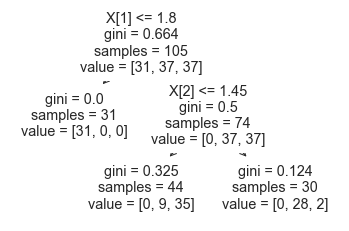

In [31]:
tree.plot_tree(clf);

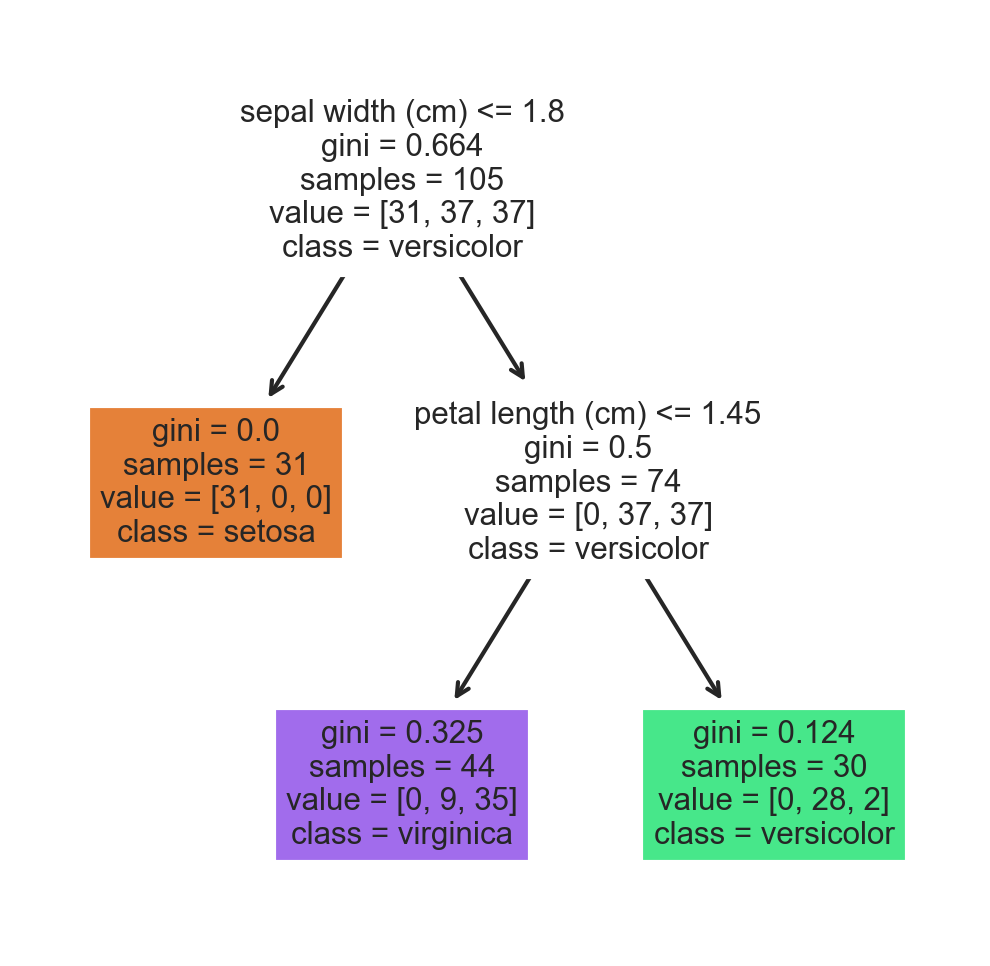

In [32]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [35]:
print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt,cv=3, scoring='accuracy').mean())

Accuracy score is: 0.82997311827957


In [36]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = Iris_clf.predict(Xcv)

print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.7272727272727273


array([[[9, 1],
        [0, 1]],

       [[4, 0],
        [3, 4]],

       [[6, 2],
        [0, 3]]])

In [37]:
YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 91.11111111111111 %


array([[[26,  0],
        [ 0, 19]],

       [[29,  3],
        [ 1, 12]],

       [[31,  1],
        [ 3, 10]]])

[Text(0.6785714285714286, 0.9444444444444444, 'X[2] <= 2.6\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.6071428571428571, 0.8333333333333334, 'X[2] <= 1.45\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.35714285714285715, 0.7222222222222222, 'X[3] <= 1.35\ngini = 0.325\nsamples = 44\nvalue = [0, 9, 35]'),
 Text(0.21428571428571427, 0.6111111111111112, 'X[1] <= 2.6\ngini = 0.157\nsamples = 35\nvalue = [0, 3, 32]'),
 Text(0.14285714285714285, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2857142857142857, 0.5, 'X[2] <= 1.35\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(0.14285714285714285, 0.3888888888888889, 'X[3] <= 1.05\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(0.07142857142857142, 0.2777777777777778, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 19]'),
 Text(0.21428571428571427, 0.2777777777777778, 'X[1] <= 3.55\ngini = 0.153\nsamples = 12\nvalue = [0, 1, 11]'),
 Text(0.14285714285714285, 0.16666666666666666, 'X[0] <= 3.

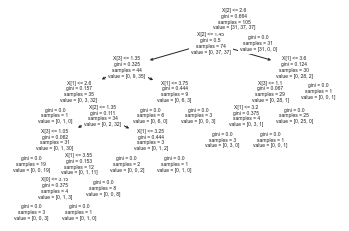

In [38]:
#training model on actual train data
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)

tree.plot_tree(Iris_Fclf)

In [44]:

YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest, YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 93.33333333333333 %


array([[[26,  0],
        [ 0, 19]],

       [[29,  3],
        [ 0, 13]],

       [[32,  0],
        [ 3, 10]]])